# SpaceX Falcon 9 First Stage Landing Prediction

## Assignment: Exploring and Preparing Data

### In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

### In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

In [2]:
# import libraries

import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [3]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-3-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Exploratory Data Analysis

##### First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


###### First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

###### We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.

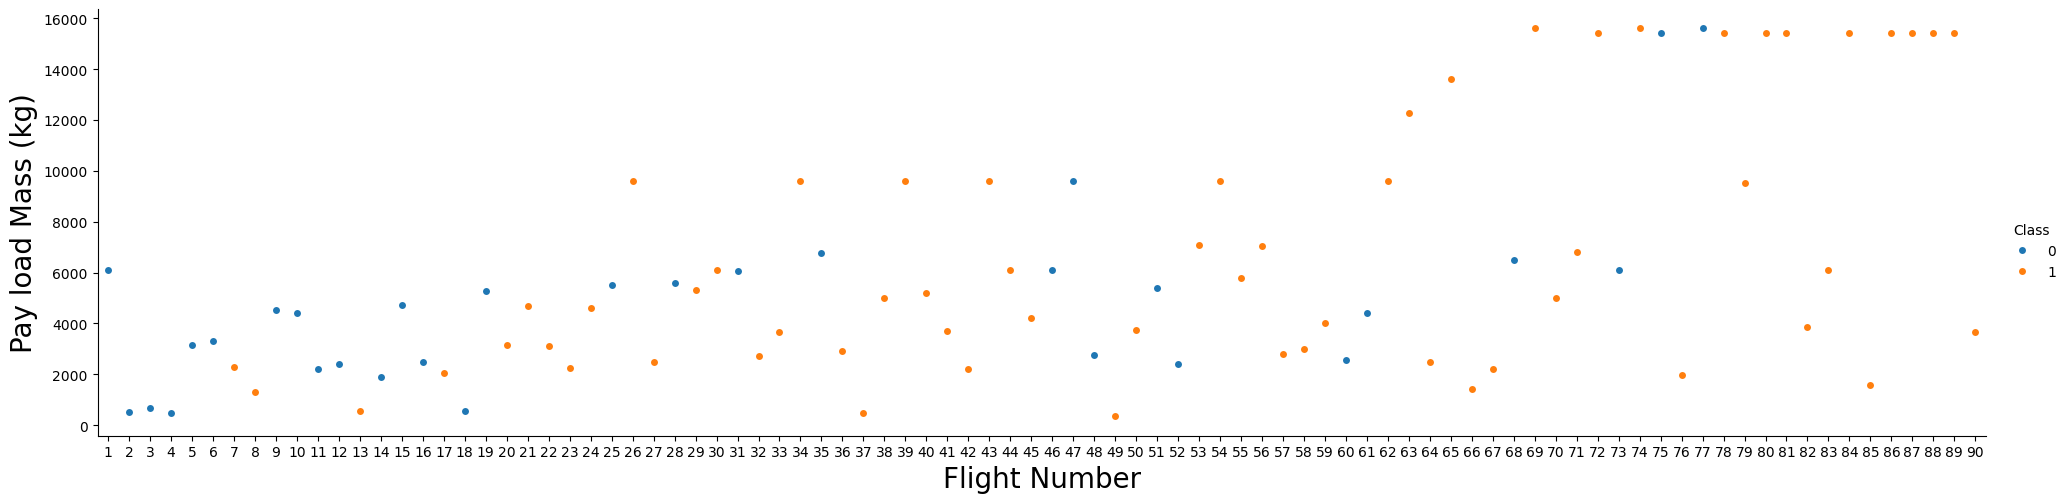

In [7]:
# scatter plot with x axis to be flight# and y axis to be pay load mass with fontsize:20
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

# TASK 1: Visualize the relationship between Flight Number and Launch Site

#### Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

###### Scatter plot with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

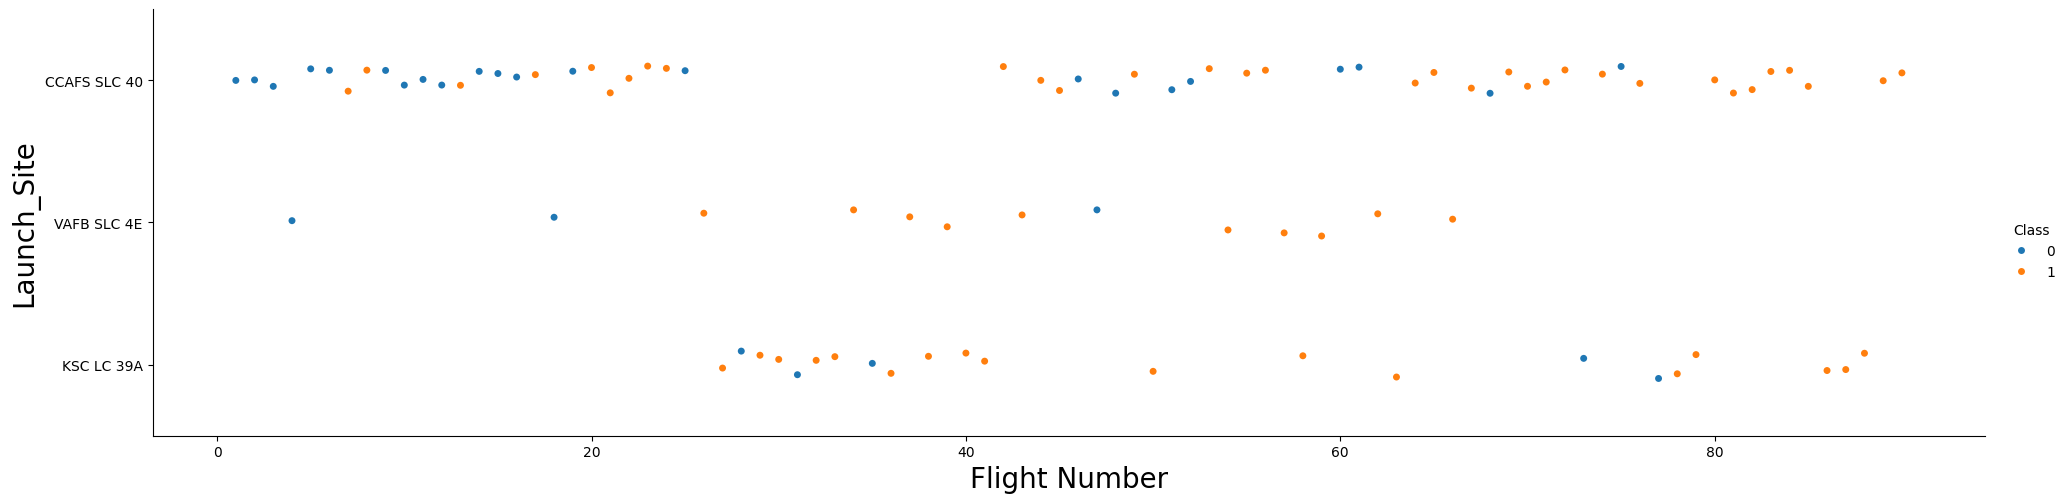

In [8]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch_Site",fontsize=20)
plt.show()

# TASK 2: Visualize the relationship between Payload Mass and Launch Site

###### Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

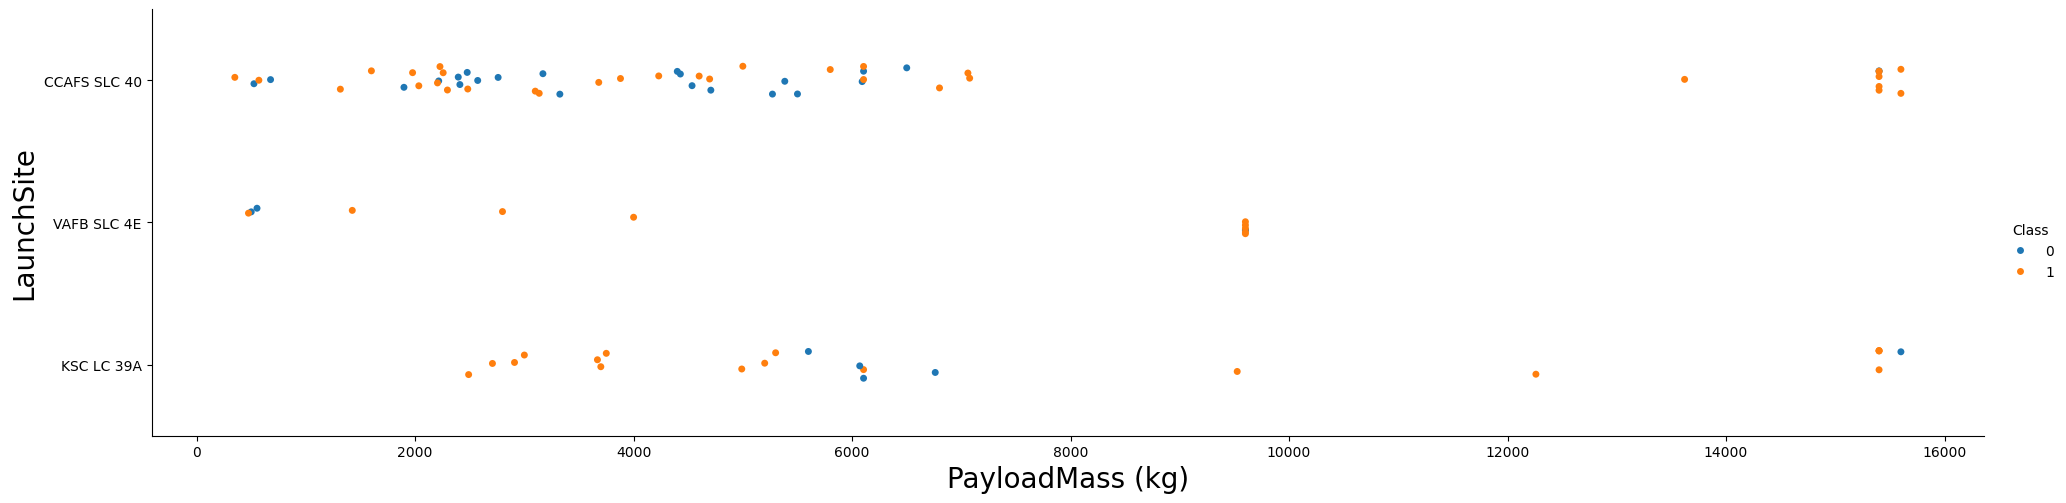

In [11]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 4)
plt.xlabel("PayloadMass (kg)",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

# TASK 3: Visualize the relationship between success rate of each orbit type

### Next, we want to visually check if there are any relationship between success rate and orbit type.

### Let's create a bar chart for the sucess rate of each orbit

In [13]:
# HINT use groupby method on Orbit column and get the mean of Class column

bar_data = df.groupby(['Orbit'])['Class'].mean().reset_index()
bar_data.set_index('Orbit', inplace = True)

bar_data

,Class
Orbit,
ES-L1,1.000000
GEO,1.000000
GTO,0.518519
HEO,1.000000
ISS,0.619048
LEO,0.714286
MEO,0.666667
PO,0.666667
SO,0.000000


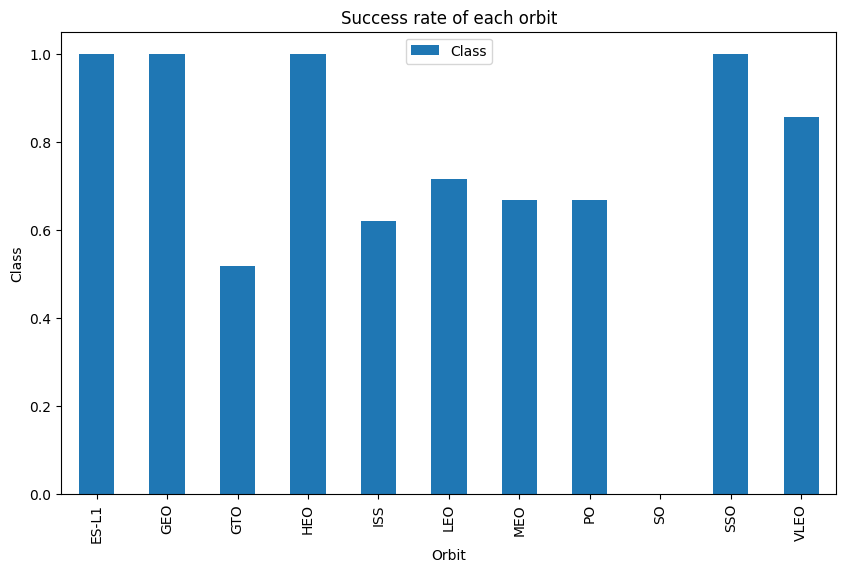

In [14]:
# BUILD BAR GRAPH

bar_data.plot(kind='bar', figsize=(10,6))

#plt.xticks(bar_data['Orbit'], rotation = '65')

# plot = plt.xlabel('')

plt.xlabel('Orbit')
plt.ylabel('Class')
plt.title('Success rate of each orbit')

plt.show()


# TASK 4: Visualize the relationship between FlightNumber and Orbit type

#### For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

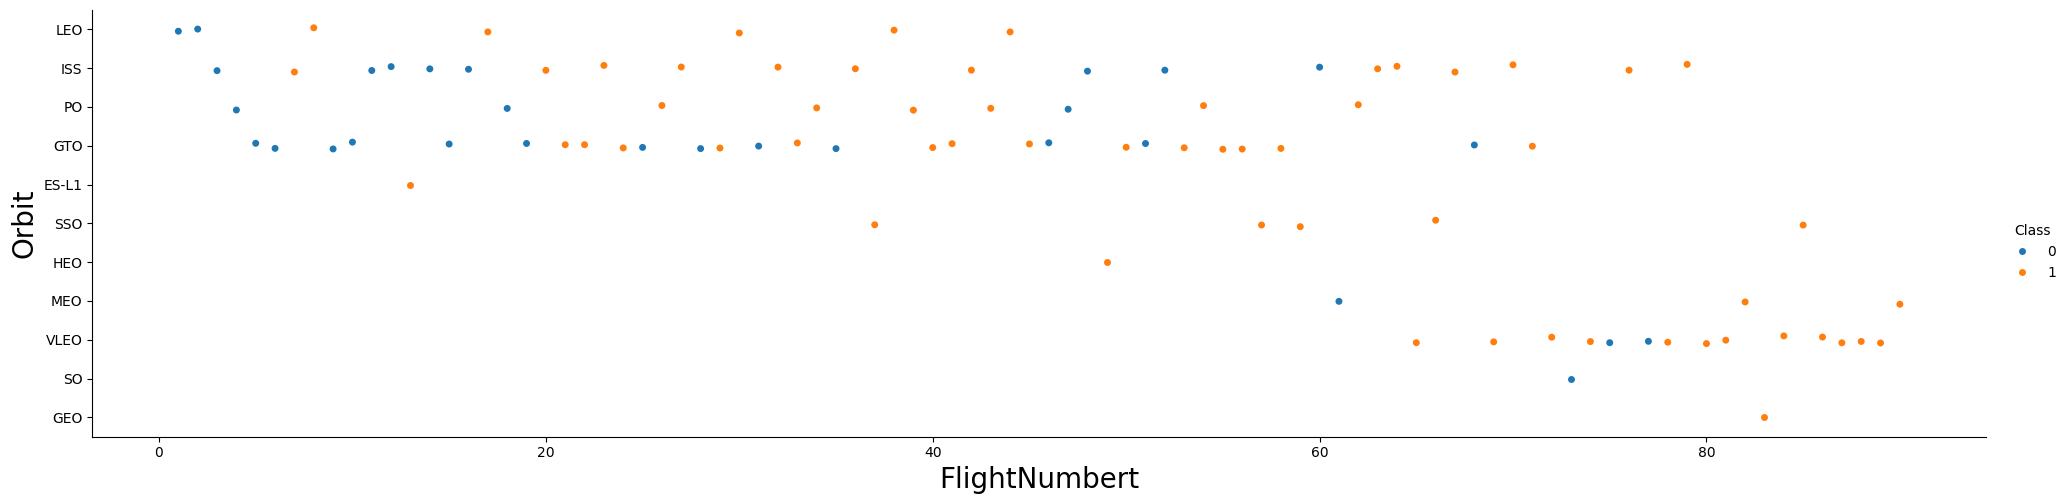

In [16]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("FlightNumbert",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

###### You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

# TASK 5: Visualize the relationship between Payload and Orbit type

##### Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

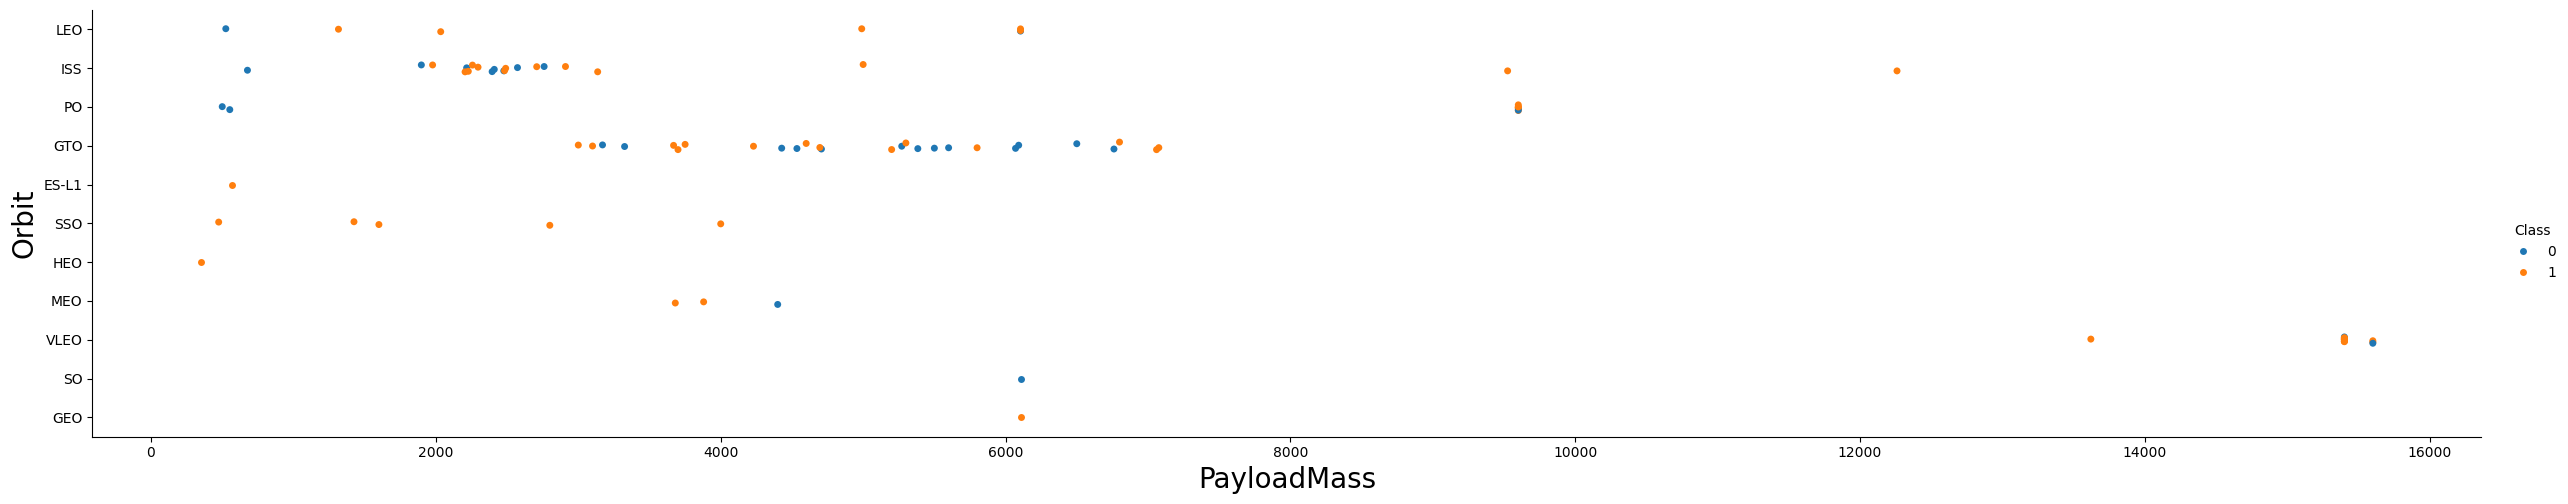

In [17]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

###### With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

###### However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

# TASK 6: Visualize the launch success yearly trend

#### You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

In [20]:
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Text(0.5, 1.0, 'Sucess Rate of Each Year')

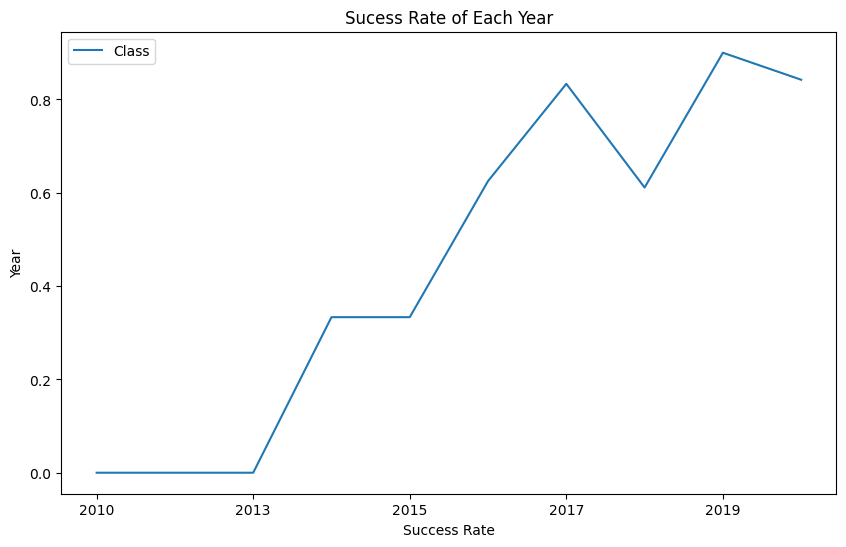

In [21]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

Year = Extract_year(df["Date"])
data1 = pd.DataFrame(list(zip(df["Class"], Year)), columns =['Class', 'Year'])
chartData = data1.groupby(['Year'])['Class'].mean().reset_index()               
chartData.set_index('Year', inplace=True)

chartData.plot(kind='line', figsize=(10, 6))

# add to x-label to the plot
plt.xlabel('Success Rate') 
# add y-label to the plot
plt.ylabel('Year') 
# add title to the plot
plt.title('Sucess Rate of Each Year') 

### Features Engineering
###### By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [22]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


# TASK 7: Create dummy variables to categorical columns
###### Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [ ]:
# HINT: Use get_dummies() function on the categorical columns

nondummy = features.loc[:,['FlightNumber','PayloadMass','Flights','GridFins','Reused','Legs','Block','ReusedCount']]

nondummy.head()